# PyLemma

This is a simple example of what you can do in Lemma using the python interface

In [ ]:
!pip install pyLemma 
!pip install numpy 
!pip install matplotlib
!pip install cmocean

In [25]:
from pyLemma import FDEM1D 
import numpy as np
import matplotlib.pyplot as plt 
import cmocean

def symlog(x):
    """ Returns the symmetric log10 value """
    return np.sign(x) * np.log10(np.abs(x))

wire = FDEM1D.PolygonalWireAntenna()
wire.SetNumberOfPoints(4)
wire.SetPoint(0, (-50,-50,  -1e-2))
wire.SetPoint(1, (-50, 50,  -1e-2))
wire.SetPoint(2, ( 50, 50,  -1e-2))
wire.SetPoint(3, ( 50,-50,  -1e-2))
wire.SetNumberOfFrequencies(1)
wire.SetFrequency(0, 10)
wire.SetMinDipoleMoment(1e-5)
#wire.SetMaxDipoleMoment(1e1)
wire.SetMinDipoleRatio(1/10)
#print(wire) # yaml representation

earth = FDEM1D.LayeredEarthEM()
earth.SetNumberOfLayers(3)
earth.SetLayerThickness([100])
earth.SetLayerConductivity([0, 1/100, 1/300])
#print(earth) # yaml representation

points = FDEM1D.FieldPoints()
nx, ny, nz = 101,101,1
ox, oy, oz = -100, -100, 5
dx, dy, dz = 2, 2, 20
points.SetNumberOfPoints(nx*ny*nz)
ip = 0
for ix in range(nx):
    for iy in range(ny):
        for iz in range(nz):
            points.SetLocation(ip, [ox+dx*ix, oy+dy*iy, oz+dz*iz])
            ip += 1
#print(points) # yaml representation

## Sets up the parameters for the simulation
* a square sided transmitter of 100 m length
* calculation points on a grid 
* a two layer earth model

In [26]:
em1d = FDEM1D.EMEarth1D()
em1d.AttachFieldPoints(points)
em1d.AttachWireAntenna(wire)
em1d.AttachLayeredEarthEM(earth)
em1d.CalculateWireAntennaFields(True)
#print(em1d) # yaml representation 

This block runs the calculation, and can take some time

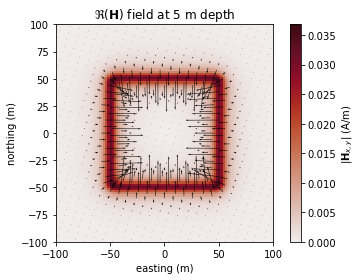

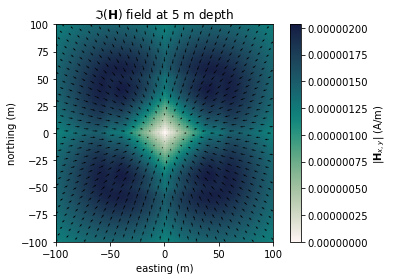

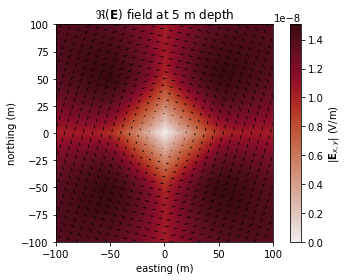

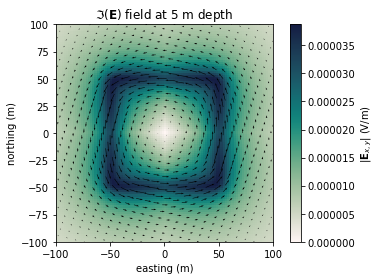

In [27]:
Locs = points.GetLocations()
Efield = points.GetEfield(0)
Hfield = points.GetHfield(0)

# stride sets how many quiver points to plot, this is how many indices are skipped in 
#        setting quiver points
stride = 13

# grid for plotting results 
X,Y = np.meshgrid( np.arange(ox, ox+dx*nx, dx), np.arange(oy, oy+dy*ny, dy) )

# Real H 
fig = plt.figure()
ax1 = fig.add_subplot(111,aspect='equal')
im1 = ax1.pcolormesh( X, Y, np.reshape(np.abs(np.real(Hfield[0]))+np.abs(np.real(Hfield[1])), (nx, ny)), \
                    cmap=cmocean.cm.amp )
#ax1.quiver(Locs[0,0::stride], Locs[1,0::stride], symlog(np.real(Hfield[0,0::stride])), symlog(np.real(Hfield[1,0::stride])))
ax1.quiver(Locs[0,0::stride], Locs[1,0::stride], np.real(Hfield[0,0::stride]), np.real(Hfield[1,0::stride]))
cb = plt.colorbar(im1)
cb.ax.set_ylabel("$|\mathbf{H}_{x,y}|$ (A/m)")
ax1.set_xlabel("easting (m)")
ax1.set_ylabel("northing (m)")
ax1.set_title("$\Re(\mathbf{H})$ field at " + str(oz) +  " m depth")

# Imag H 
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,aspect='equal')
im2 = ax2.pcolormesh( X, Y, np.reshape(np.abs(np.imag(Hfield[0]))+np.abs(np.imag(Hfield[1])), (nx, ny)), \
                    cmap=cmocean.cm.tempo )
ax2.quiver(Locs[0,0::stride], Locs[1,0::stride], np.imag(Hfield[0,0::stride]), np.imag(Hfield[1,0::stride]))
cb2 = plt.colorbar(im2)
cb2.ax.set_ylabel("$|\mathbf{H}_{x,y}|$ (A/m)")
ax2.set_xlabel("easting (m)")
ax2.set_ylabel("northing (m)")
ax2.set_title("$\Im(\mathbf{H})$ field at " + str(oz) +  " m depth")

# Real E 
fig = plt.figure()
ax1 = fig.add_subplot(111,aspect='equal')
im1 = ax1.pcolormesh( X, Y, np.reshape(np.abs(np.real(Efield[0]))+np.abs(np.real(Efield[1])), (nx, ny)), \
                    cmap=cmocean.cm.amp )
ax1.quiver(Locs[0,0::stride], Locs[1,0::stride], np.real(Efield[0,0::stride]), np.real(Efield[1,0::stride]))
cb = plt.colorbar(im1)
cb.ax.set_ylabel("$|\mathbf{E}_{x,y}|$ (V/m)")
ax1.set_xlabel("easting (m)")
ax1.set_ylabel("northing (m)")
ax1.set_title("$\Re(\mathbf{E})$ field at " + str(oz) +  " m depth")

# Imag E 
fig2 = plt.figure()
ax2 = fig2.add_subplot(111,aspect='equal')
im2 = ax2.pcolormesh( X, Y, np.reshape(np.abs(np.imag(Efield[0]))+np.abs(np.imag(Efield[1])), (nx, ny)), \
                    cmap=cmocean.cm.tempo )
ax2.quiver(Locs[0,0::stride], Locs[1,0::stride], np.imag(Efield[0,0::stride]), np.imag(Efield[1,0::stride]))
cb2 = plt.colorbar(im2)
cb2.ax.set_ylabel("$|\mathbf{E}_{x,y}|$ (V/m)")
ax2.set_xlabel("easting (m)")
ax2.set_ylabel("northing (m)")
ax2.set_title("$\Im(\mathbf{E})$ field at " + str(oz) +  " m depth")

plt.show()

#help(FDEM1D.EMEarth1D)